<a href="https://colab.research.google.com/github/jborri/DATA71200/blob/main/JB_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data I'm using is a list of books I've read over the years. I downloaded this dataset from Goodreads.com albeit i did create some new columns in excel to match. I want to explore this dataset and see if there is any relationship between my ratings and variables like length and publication year.

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading in and displaying dataset

book_log = pd.read_csv("/content/drive/MyDrive/book_log.csv", encoding='latin1')
book_log.head()

,Title,Author,Author l-f,my_rating,average_rating,pages,publication_year,Date Added,target,genre_1,Genre2,features
0,Saint Augustine's Confessions,Augustine of Hippo,"Hippo, Augustine of",3.5,3.99,423,400,11/10/23,0,Autobiography,Philosophy,3.99 423 400
1,The Giving Tree,Shel Silverstein,"Silverstein, Shel",3.7,4.38,64,1964,12/27/23,1,Children's Literature,Poetry,4.38 64 1964
2,The Little Prince,Antoine de Saint-Exupry,"Saint-Exupry, Antoine de",3.7,4.33,96,1943,11/10/23,1,Children's Literature,Philosophy,4.33 96 1943
3,Charlotte's Web,E.B. White,"White, E.B.",3.3,4.21,184,1952,12/27/23,1,Children's Literature,Fiction,4.21 184 1952
4,The Sun Also Rises,Ernest Hemingway,"Hemingway, Ernest",3.5,3.79,189,1926,11/10/23,2,Classic,Fiction,3.79 189 1926


In [3]:
# making the 'features' column to a numpy array for training dataframe.
features_array = np.array(book_log['features'].str.split(' ', expand=True).astype(float))

# displaying shape and verifying the type
print("\nType of features array:", type(features_array))
print("Shape of features array:", features_array.shape)


Type of features array: <class 'numpy.ndarray'>
Shape of features array: (270, 3)


# **Step 2: Dividing into a training set and a testing set.**

In [4]:
# dividing dataset into test and training sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_array, book_log['my_rating'], random_state=0)

In [5]:
# displaying the shape of the training and test data

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (202, 3)
y_train shape: (202,)
X_test shape: (68, 3)
y_test shape: (68,)


# **Data cleaning.**

In [6]:
# creating a DataFrame from the training data

# adding column names in features_array to correspond to 'average_rating', 'pages', and 'publication_year'
training_data_df = pd.DataFrame(X_train, columns=['average_rating', 'pages', 'publication_year'])

# adding the 'my_rating' column from y_train
training_data_df['my_rating'] = y_train.values

# Display the head of the new DataFrame
display(training_data_df.head())

,average_rating,pages,publication_year,my_rating
0,4.24,607.0,1969.0,4.5
1,4.35,371.0,2003.0,4.5
2,3.60,224.0,1973.0,4.0
3,4.01,141.0,1945.0,3.7
4,4.02,496.0,1939.0,4.2


# **Step 3: Explore your training set.**

In [7]:
# looking at a summary of the new training set.

training_data_df.info()

# providing some descriptive statistics of the new set.
training_data_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   average_rating    202 non-null    float64
 1   pages             202 non-null    float64
 2   publication_year  202 non-null    float64
 3   my_rating         202 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,average_rating,pages,publication_year,my_rating
count,202.000000,202.000000,202.000000,202.000000
mean,4.023960,334.089109,1830.158416,4.326733
std,0.275918,239.437654,412.303183,0.614322
min,3.310000,0.000000,-405.000000,3.100000
25%,3.840000,185.250000,1870.500000,4.000000
50%,4.050000,272.000000,1948.000000,4.450000
75%,4.227500,428.250000,1974.750000,5.000000
max,4.620000,1463.000000,2020.000000,5.000000


# **Step 5: Visualize the data in your training set.**

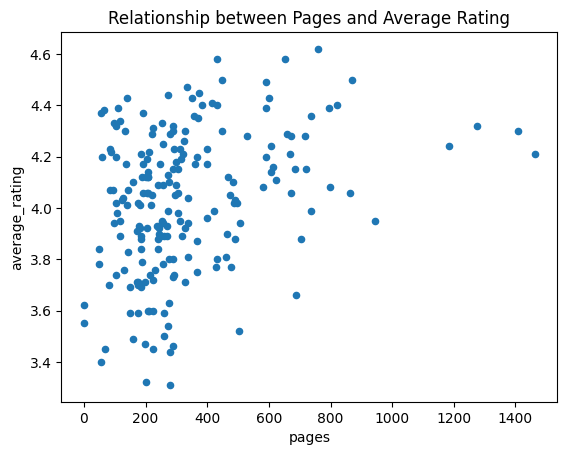

In [8]:
# creating a scatter plot of 'pages' vs 'average_rating'
training_data_df.plot(kind='scatter', x='pages', y='average_rating', title='Relationship between Pages and Average Rating')
plt.show()

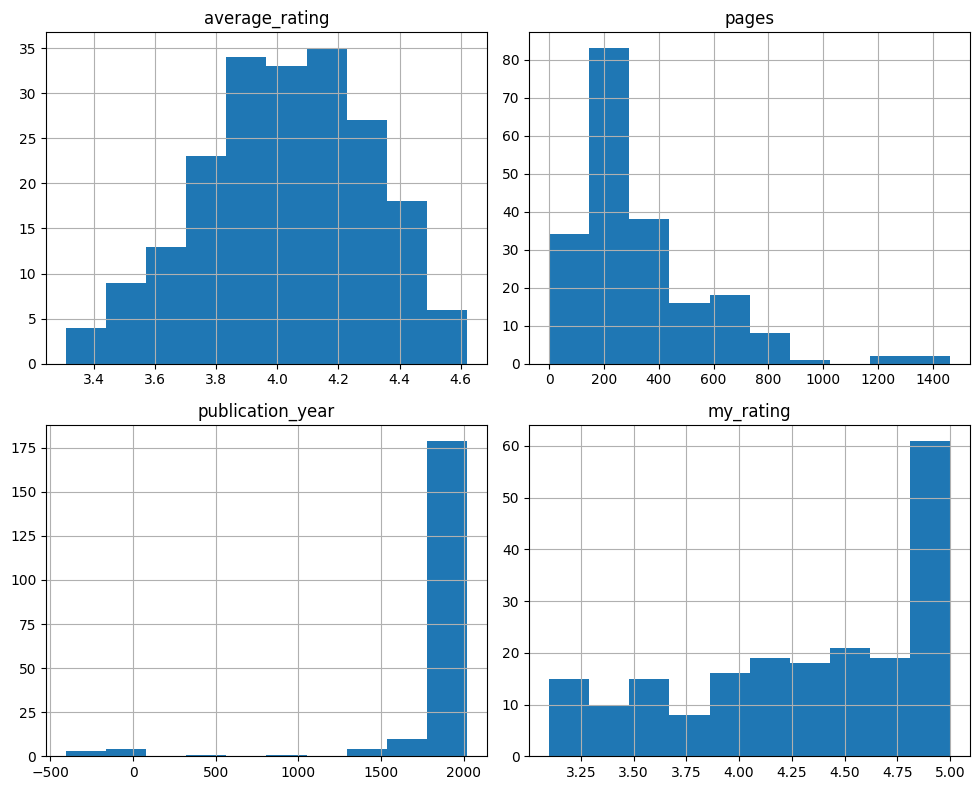

In [9]:


training_data_df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

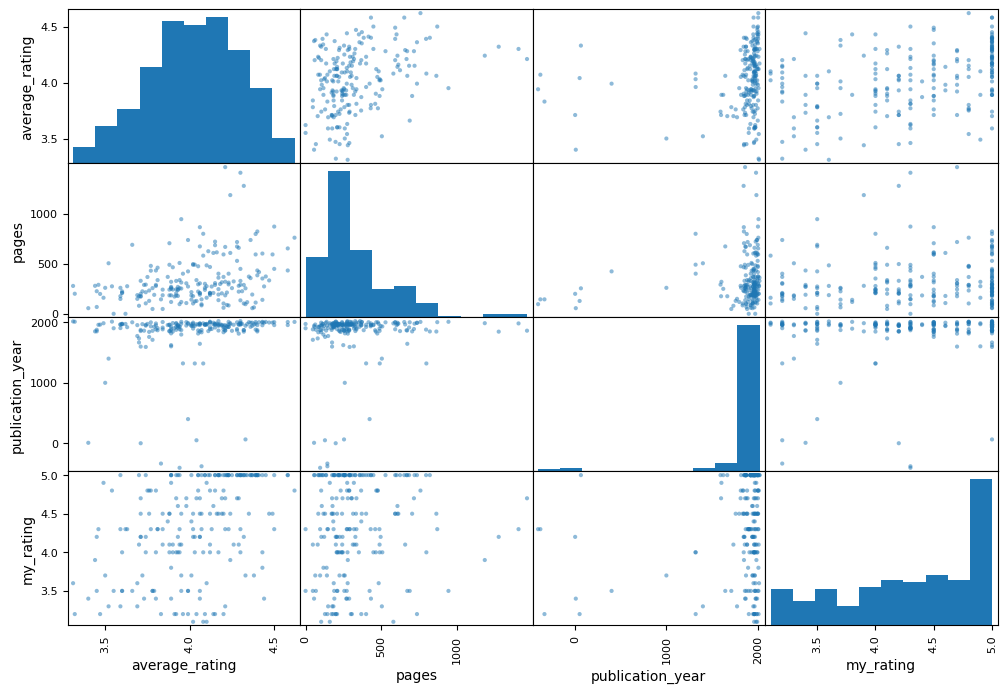

In [10]:
from pandas.plotting import scatter_matrix

scatter_matrix(training_data_df, figsize=(12, 8))
plt.show()

In [11]:
print(training_data_df.columns)

Index(['average_rating', 'pages', 'publication_year', 'my_rating'], dtype='object')


# **Step 6: Apply transformations to your data.**

In [12]:


# applying logarithmic transformation
training_data_df['pages_log'] = np.log(training_data_df['pages'])
training_data_df['publication_year_log'] = np.log(training_data_df['publication_year'])


# applying exponential transformation
training_data_df['pages_exp'] = np.exp(training_data_df['pages'])
training_data_df['publication_year_exp'] = np.exp(training_data_df['publication_year'])

# showing the head of the DataFrame with new transformed columns
display(training_data_df.head())

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,average_rating,pages,publication_year,my_rating,pages_log,publication_year_log,pages_exp,publication_year_exp
0,4.24,607.0,1969.0,4.5,6.408529,7.585281,4.137619e+263,inf
1,4.35,371.0,2003.0,4.5,5.916202,7.602401,1.328167e+161,inf
2,3.60,224.0,1973.0,4.0,5.411646,7.587311,1.914097e+97,inf
3,4.01,141.0,1945.0,3.7,4.948760,7.573017,1.719974e+61,inf
4,4.02,496.0,1939.0,4.2,6.206576,7.569928,2.570769e+215,inf


**(cleaning again)**

In [14]:
# i see infinite numbers so going to use describe for more info

print(training_data_df.dtypes)
display(training_data_df.describe())

average_rating          float64
pages                   float64
publication_year        float64
my_rating               float64
pages_log               float64
publication_year_log    float64
pages_exp               float64
publication_year_exp    float64
dtype: object


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,average_rating,pages,publication_year,my_rating,pages_log,publication_year_log,pages_exp,publication_year_exp
count,202.000000,202.000000,202.000000,202.000000,202.000000,1.990000e+02,2.020000e+02,2.020000e+02
mean,4.023960,334.089109,1830.158416,4.326733,5.347945,7.442589e+00,inf,inf
std,0.275918,239.437654,412.303183,0.614322,2.695177,7.557564e-01,NaN,NaN
min,3.310000,0.000000,-405.000000,3.100000,-20.723266,1.000000e-09,1.000000e+00,1.290431e-176
25%,3.840000,185.250000,1870.500000,4.000000,5.221704,7.534763e+00,3.159983e+80,NaN
50%,4.050000,272.000000,1948.000000,4.450000,5.605802,7.575072e+00,1.343071e+118,NaN
75%,4.227500,428.250000,1974.750000,5.000000,6.059682,7.588324e+00,4.186205e+186,NaN
max,4.620000,1463.000000,2020.000000,5.000000,7.288244,7.610853e+00,inf,inf


In [ ]:
#okay need to drop those columns lol

training_data_df = training_data_df.drop(columns=['pages_exp', 'publication_year_exp'])

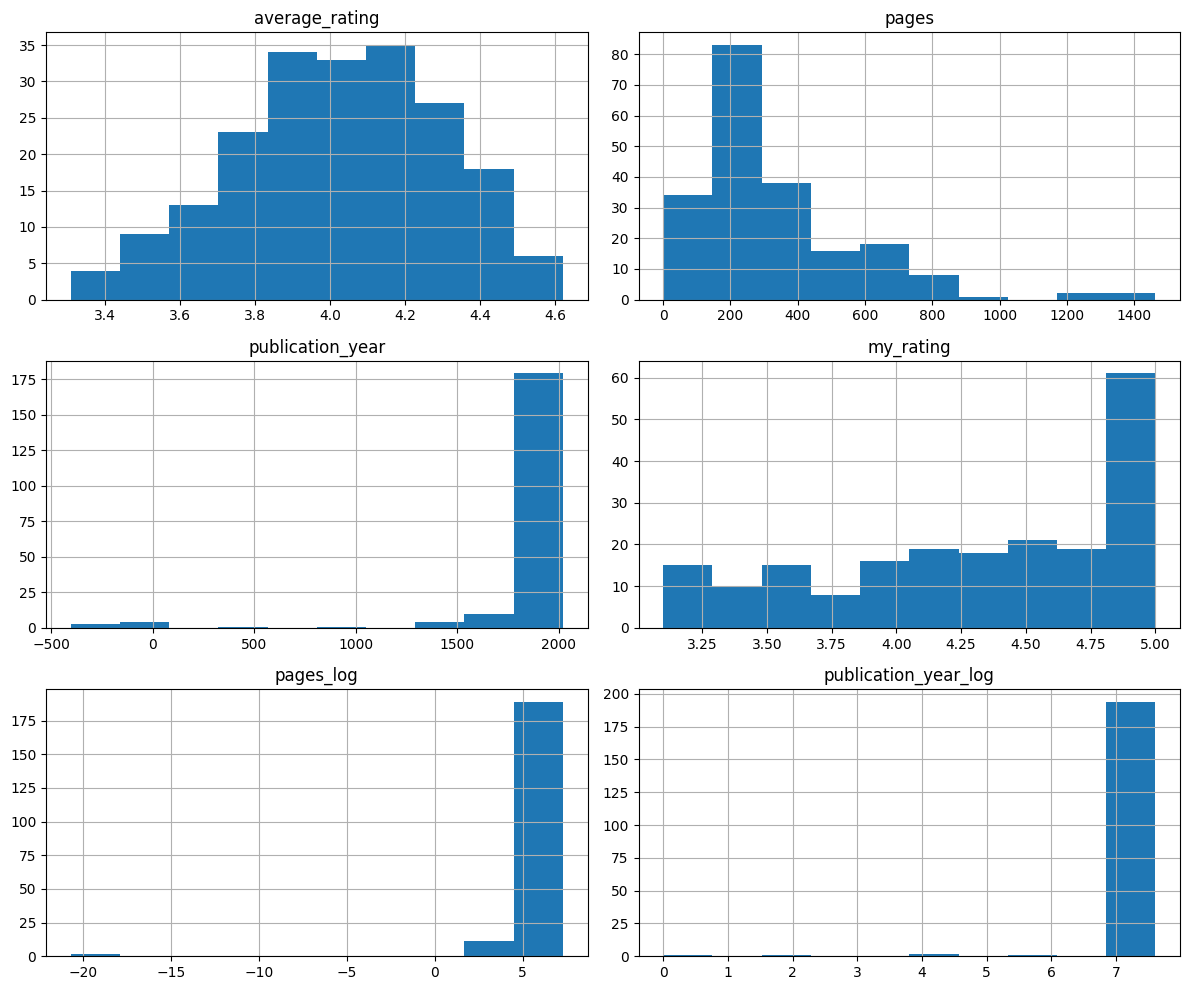

In [15]:
training_data_df = training_data_df.drop(columns=['pages_exp', 'publication_year_exp'])
training_data_df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

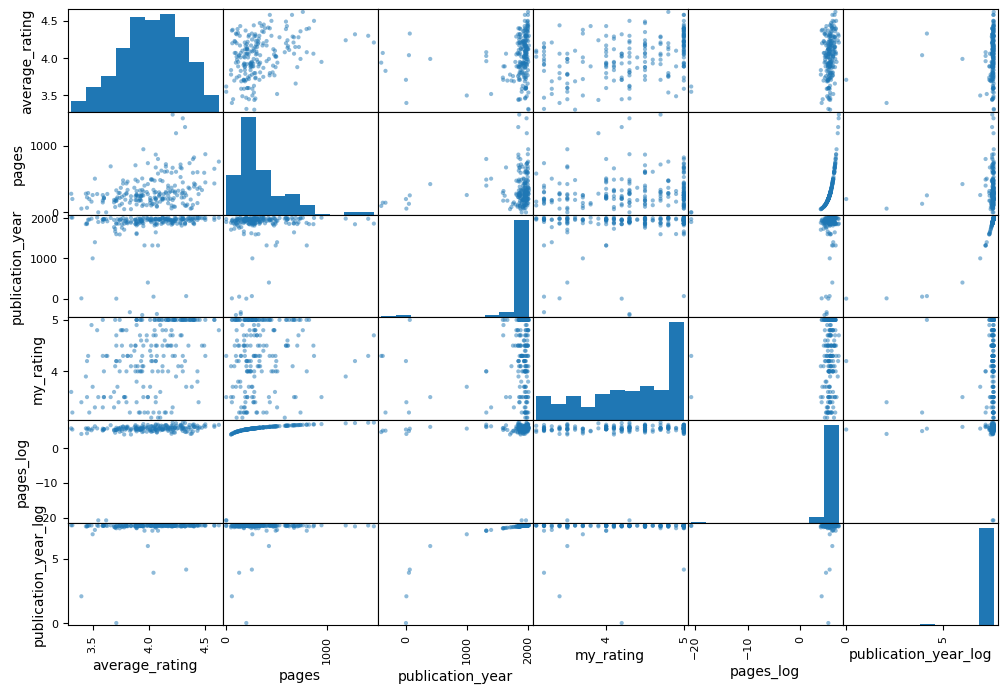

In [16]:
scatter_matrix(training_data_df, figsize=(12, 8))
plt.show()